In [1]:
import cv2
# to install cv2 use: pip install opencv-python
import math
import matplotlib.pyplot as plt 
import numpy as np

(540, 466)


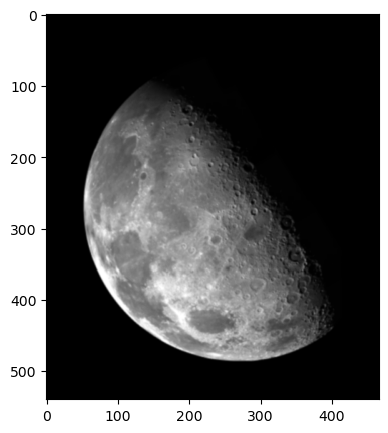

In [2]:
fname = 'Images/moon.png'
img = cv2.imread(fname,cv2.IMREAD_GRAYSCALE)
print(img.shape)
fig = plt.figure(figsize=(15,5))
plt.imshow(img, cmap='gray')

In [3]:
# correlate
def correlate (kernel, image):
    W = image.shape[0]
    H = image.shape[1]
    out =np.zeros((W,H))
    a = kernel.shape[0]%2
    b = kernel.shape[1]%2
    #print (a,b)
    for y in range(b,H-b): 
        for x in range(a,W-a): 
            for s in range (-a,a+1):
                for t in range (-b, b+1):
                    out[x,y] += (kernel[s,t]*image[x+s,y+t])
    return out

In [4]:
def rescale (image):
    image = np.absolute(image)
    mymin=np.amin(image)
    mymax=np.amax(image)
    W = image.shape[0]
    H = image.shape[1]
    for y in range(H): 
        for x in range(W): 
            image[x,y] = (image[x,y]-mymin)*256/(mymax-mymin)
    return image

In [5]:
Laplace = np.array([[-1,-1,-1], [-1, 8, -1],[-1,-1,-1]], dtype=float)
#print(Laplace)

In [6]:
dImg = correlate (Laplace, img)
dImg = rescale (dImg)

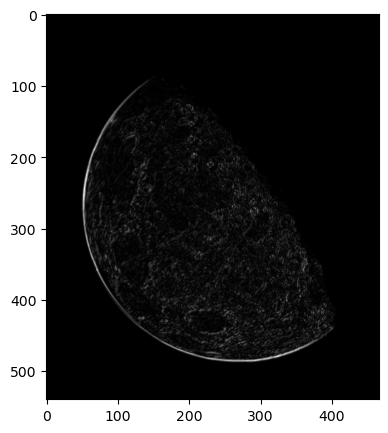

In [7]:
fig = plt.figure(figsize=(15,5))
plt.imshow(dImg, cmap='gray')

In [8]:
# sharpen edges
eImg = 0.5*dImg + 0.5*img

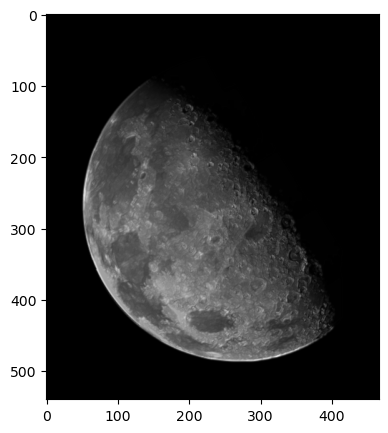

In [9]:
fig = plt.figure(figsize=(15,5))
plt.imshow(eImg, cmap='gray')

## Sobel gradient operators

(512, 512)


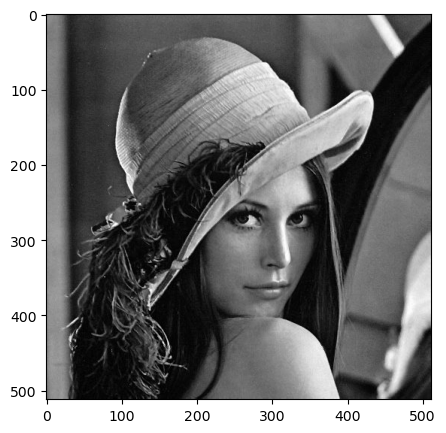

In [10]:
fname = 'Images/lena.jpg'
img = cv2.imread(fname,cv2.IMREAD_GRAYSCALE)
print(img.shape)
fig = plt.figure(figsize=(15,5))
plt.imshow(img, cmap='gray')

In [11]:
Sobel_y = np.array([[-1,0,1], [-2, 0, 2],[-1,0,1]], dtype=float)
Sobel_x = np.array([[-1,-2,-1], [0, 0, 0],[1,2,1]], dtype=float)

In [12]:
gx = correlate(Sobel_x, img)
gx = np.absolute(gx)
gy = correlate(Sobel_y, img)
gy = np.absolute(gy)


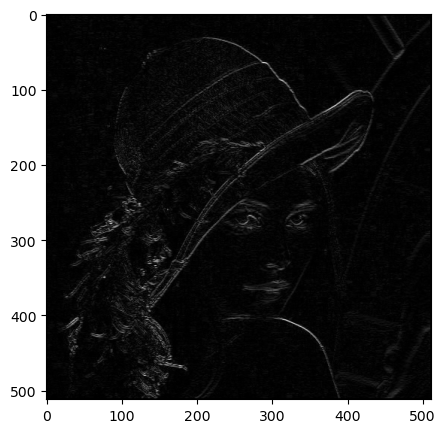

In [13]:
fig = plt.figure(figsize=(15,5))
plt.imshow(gx, cmap='gray')

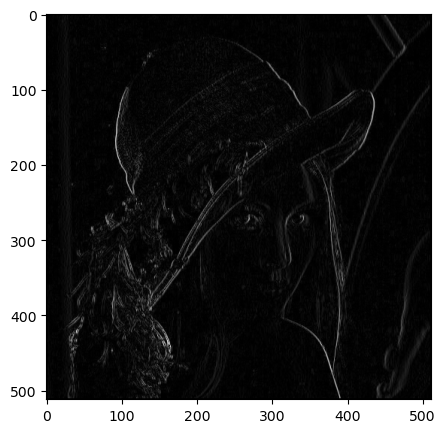

In [14]:
fig = plt.figure(figsize=(15,5))
plt.imshow(gy, cmap='gray')

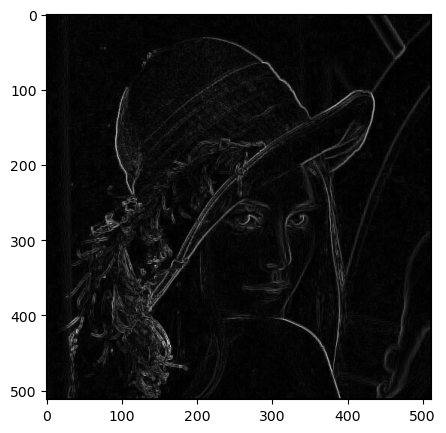

In [15]:
grad = np.sqrt(np.square(gx) + np.square(gy))
fig = plt.figure(figsize=(15,5))
plt.imshow(grad, cmap='gray')